In [1]:
import pickle
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 20})
import numpy as np
import bisect

In [2]:
def plot_fn(ax, dat, idx, fmt, label, lw):
    ax.plot(dat[0], dat[idx+1][0], fmt, label=label, linewidth=lw)
    
    std = dat[idx+1][1]
    std = np.clip(std, 0.1, None)
    _ = np.sqrt(3)
    lower, upper = dat[idx+1][0] - std/_, dat[idx+1][0] + std/_
    ax.fill_between(dat[0], lower, upper, alpha=0.3, color=fmt[0])
    
def fetch(file_fmt, seeds, xlim=2900):
    nums, err_1s, err_2s, err_3s = [], [], [], []
    for seed in seeds:
        file_name = file_fmt % seed
        with open(file_name, "rb") as f:
            perf_bern = pickle.load(f)
            if type(perf_bern) == dict:
                perf_bern = list(perf_bern.items())
            num = [_[0] for _ in perf_bern]
            _err1, _err2, _err3, _ = zip(*[_[1][:-1] for _ in perf_bern])
            ni = bisect.bisect_right(num, xlim)
            
            nums.append(num[:ni])
            err_1s.append(_err1[:ni])
            err_2s.append(_err2[:ni])
            err_3s.append(_err3[:ni])
    err_1s = [dict(zip(nums[ni], err_1s[ni])) for ni in range(len(nums))]
    err_2s = [dict(zip(nums[ni], err_2s[ni])) for ni in range(len(nums))]
    err_3s = [dict(zip(nums[ni], err_3s[ni])) for ni in range(len(nums))]
    if len(nums) > 1:
        x = np.intersect1d(*nums)
    else:
        x = nums[0]
    y = []
    for _num in x:
        _n = len(err_1s)
        _e1 = [err_1s[si][_num] for si in range(_n)]
        _e2 = [err_2s[si][_num] for si in range(_n)]
        _e3 = [err_3s[si][_num] for si in range(_n)]
        # 3 x 3 (seeds)
        _e = np.array([_e1, _e2, _e3])
        y.append([100*np.mean(_e, axis=-1), 100*np.std(_e, axis=-1)])
    # n x 2 x 3
    y = np.array(y)
    # 2 x n x 3
    y = np.transpose(y, [1, 0, 2])
    return x, y[:, :, 0], y[:, :, 1], y[:, :, 2]
#     _n = min([len(num) for num in nums])
#     _arr = np.array([err_1s[ei][:_n] for ei in range(len(seeds))])
#     _e1 = (100*np.mean(_arr, axis=0), 100*np.std(_arr, axis=0))
#     _arr = np.array([err_2s[ei][:_n] for ei in range(len(seeds))])
#     _e2 = (100*np.mean(_arr, axis=0), 100*np.std(_arr, axis=0))
#     _arr = np.array([err_3s[ei][:_n] for ei in range(len(seeds))])
#     _e3 = (100*np.mean(_arr, axis=0), 100*np.std(_arr, axis=0))
#     return nums[0][:_n], _e1, _e2, _e3

def plot(task, title, save_name, idx=0, legend=False, legend_loc=None, mark=False):
    lw = 3
#     if task.endswith('10k'):
#         num_errs = fetch("data/" + task + "/bern_gp_explore2_svariance2_width=1_seed=%d.pkl", range(3))
#         plt.plot(num_errs[0], num_errs[idx+1], "r-", label="BernGP", linewidth=lw)
#     else:
#         num_errs = fetch("data/" + task + "/bern_gp_explore_svariance2_seed=%d.pkl", range(3))
#         plt.plot(num_errs[0], num_errs[idx+1], "r-", label="BernGP", linewidth=lw)
        
#     num_errs = fetch("data/"+task+"/bern_gp_explore2_svariance2_width=3_seed=%d.pkl", range(3))
#     plt.plot(num_errs[0], num_errs[idx+1], "m-", label="BernGP-Pool", linewidth=lw)
    
    data_fldr = "../data/"+task
#     num_errs = fetch(data_fldr + "/simple_exp=random_seed=%d.pkl", range(3))
#     plt.plot(num_errs[0], num_errs[idx+1], "r-", label="SimpleR", linewidth=lw)

    f, ax = plt.subplots(1, 1)
    num_errs = fetch(data_fldr + "/simple_exp=svariance2_seed=%d.pkl", range(3))
    plot_fn(ax, num_errs, idx, "b-", "Beta-I", lw)
    
    num_errs = fetch(data_fldr + "/beta_gp_rloss_explore_svariance2_width=3_rlapprox=baseline_nsl_seed=%d.pkl", range(3))
    plot_fn(ax, num_errs, idx, "r-", "BetaGP", lw)
    
#     num_errs = fetch(data_fldr + "/beta_gp_rloss_explore_random_width=3_rlapprox=baseline_seed=%d.pkl", range(3))
#     plt.plot(num_errs[0], num_errs[idx+1], "g-", label="BetaGP-SLR", linewidth=lw)
#     num_errs = fetch(data_fldr + "/beta_gp_rloss_explore_svariance2_width=3_rlapprox=simplev3_nsl_seed=%d.pkl", range(3))
#     plt.plot(num_errs[0], num_errs[idx+1], "y-", label="BetaGP-Pool", linewidth=lw)    
#     num_errs = fetch(data_fldr + "/beta_gp_rloss_explore_svariance2_width=3_rlapprox=simplev3_seed=%d.pkl", range(3))
#     plt.plot(num_errs[0], num_errs[idx+1], "c-", label="BetaGP-Sl-Pool", linewidth=lw)

    if task != 'celeba_private':
        num_errs = fetch(data_fldr + "/beta_gp_rloss_explore_svariance2_width=3_rlapprox=simplev3_seed=%d.pkl", range(3) if task!='celeba' else range(1, 2))
    else:
        num_errs = fetch(data_fldr + "/beta_gp_rloss_explore_svariance2_width=3_rlapprox=baseline_seed=%d.pkl", range(3))
    plot_fn(ax, num_errs, idx, "c-", "BetaGP-SLP", lw)
        
    plt.title(title,fontdict = {'fontsize' : 20})
    if legend:
        if legend_loc is None:
            legend_loc = 'best'
        plt.legend(prop={'size': 18}, loc=legend_loc)
    if mark:
        plt.xlabel('Number Explored')
        plt.ylabel('MSE')
    plt.tight_layout(pad=0.1)
    plt.savefig(save_name)
    plt.show()

    
def plot2(task, title, save_name, idx=0, legend=False, legend_loc=None, mark=False):
    lw = 3
    
    ckpts = [{"name": "simple_exp=svariance2_mega_seed=%d_estimation_ablation.pkl",
              "label": "Beta-I",
              "fmt": "b*-"},
             {"name": "beta_gp_rloss_explorer_exp=svariance2_width=3_rlapprox=baseline_nsl_mega_seed=%d_estimation_ablation.pkl",
              "label": "BetaGP",
              "fmt": "r*-"},
             {"name": "beta_gp_rloss_explorer_exp=svariance2_width=3_rlapprox=simplev3_nbr_mega_seed=%d_estimation_ablation.pkl",
              "label": "BetaGP-SLP",
              "fmt": "c*-"}]

    f, ax = plt.subplots(1, 1)
    for _ in ckpts:
        name, label, fmt = _["name"], _["label"], _["fmt"]
        num_errs = list(fetch("../data/"+task+"/"+name, range(3)))
        num_errs[0] += 500
        plot_fn(ax, num_errs, idx, fmt, label, lw)
    if task == 'celeba':
        ax.set_ylim(18, 40)
    
    plt.title(title, fontdict = {'fontsize' : 20})
    if legend:
        if legend_loc is None:
            legend_loc = 'best'
        plt.legend(prop={'size': 18}, loc=legend_loc)
    if mark:
        plt.xlabel('Number Explored')
        plt.ylabel('MSE')
    plt.tight_layout(pad=0.1)
    plt.savefig(save_name)
    plt.show()

def plot3(task, title, save_name, idx=0, legend=False, legend_loc=None, mark=False):
    lw = 3
    
    ckpts = [{"name": "simple_exp=svariance2_mega_seed=%d_estimation_ablation.pkl",
              "label": "Cal:Full",
              "fmt": "r*-"},
             {"name": "simple_exp=svariance2_st=correctednoep_mega_seed=%d_estimation_ablation.pkl",
              "label": "Cal:Temp",
              "fmt": "b*-"},
             {"name": "simple_exp=svariance2_st=raw_mega_seed=%d_estimation_ablation.pkl",
              "label": "Cal:Raw",
              "fmt": "k*-"}]

    f, ax = plt.subplots(1, 1)
    if task == 'cocos3':
        ax.set_ylim(3, 7.5)

    for _ in ckpts:
        name, label, fmt = _["name"], _["label"], _["fmt"]
        num_errs = fetch("../data/"+task+"/"+name, range(3), xlim=5000)
        plot_fn(ax, num_errs, idx, fmt, label, lw)
    
    plt.title(title, fontdict = {'fontsize' : 20})
    if legend:
        if legend_loc is None:
            legend_loc = 'best'
        plt.legend(prop={'size': 18}, loc=legend_loc)
    if mark:
        plt.xlabel('Number Explored')
        plt.ylabel('MSE')
    plt.tight_layout(pad=0.1)
    plt.savefig(save_name)
    plt.show()


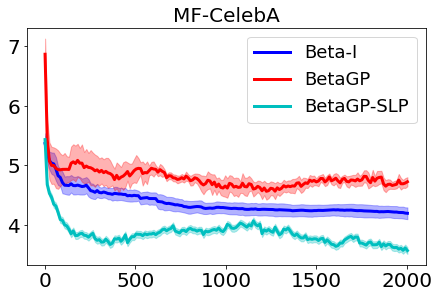

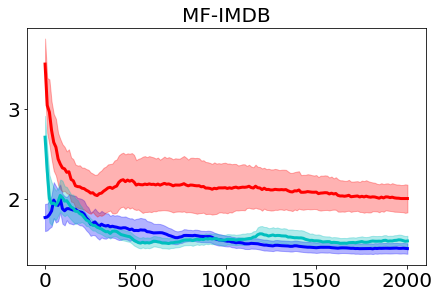

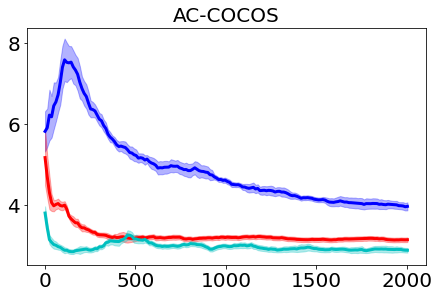

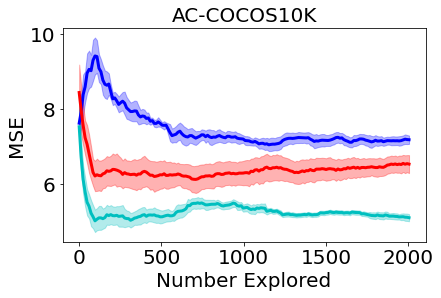

In [3]:
plot("celeba", "MF-CelebA", "../plots/celeba_explore.pdf", legend=True)
plot("celeba_private", "MF-IMDB", "../plots/celebap_explore.pdf")

# plot("celeba_private", "MF-IMDB@0.3", "plots/celebap_explore2.pdf", idx=1)
plot("cocos3", "AC-COCOS", "../plots/cocos_explore.pdf")
plot("cocos3_10k", "AC-COCOS10K", "../plots/cocos_10k_explore.pdf", mark=True)

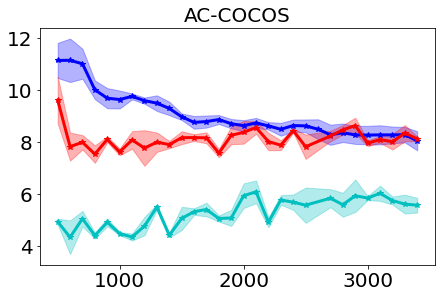

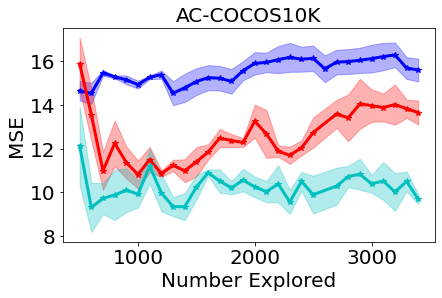

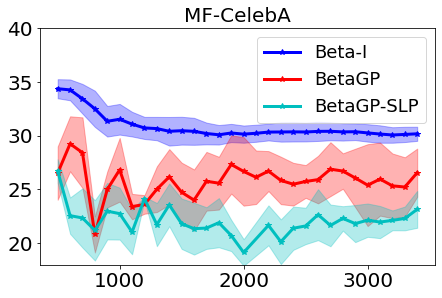

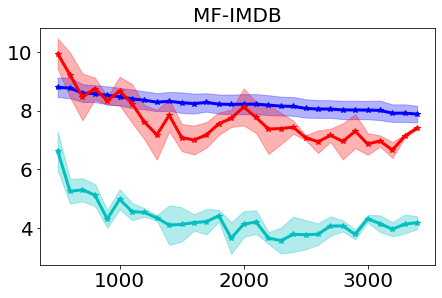

In [4]:
plot2("cocos3", "AC-COCOS", "../plots/cocos_ablation.pdf", idx=2)
plot2("cocos3_10k", "AC-COCOS10K", "../plots/cocos_10k_ablation.pdf", idx=2, mark=True)
plot2("celeba", "MF-CelebA", "../plots/celeba_ablation.pdf", legend=True, idx=2)
plot2("celeba_private", "MF-IMDB", "../plots/celebap_ablation.pdf", idx=2)

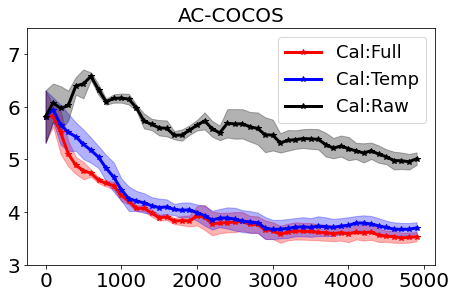

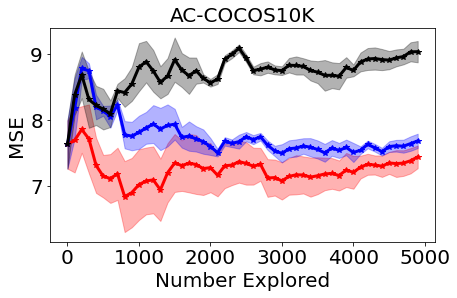

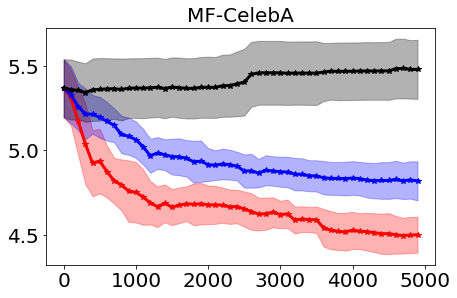

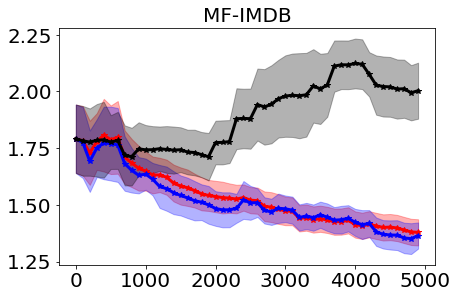

In [5]:
plot3("cocos3", "AC-COCOS", "../plots/cocos_calib.pdf", legend=True)
plot3("cocos3_10k", "AC-COCOS10K", "../plots/cocos_10k_calib.pdf", mark=True)
plot3("celeba", "MF-CelebA", "../plots/celeba_calib.pdf")
plot3("celeba_private", "MF-IMDB", "../plots/celebap_calib.pdf")